In [55]:
from PIL import Image, ImageFilter
from io import BytesIO
import requests
import matplotlib.pyplot as plt

%matplotlib inline

url = 'http://www.sanbi.ac.za/uwc_rod/wp-content/uploads/2015/03/Sanbi-HR.png'
# fetch the logo from the web
response = requests.get(url)
if response.status_code == 200:
    # status_code 200 means success
    image_data = response.content
else:
    # force an error with raise()
    raise IOError('Failed to retrieve image data:' + str(response.status_code))
# turn out downloaded data into a in-memory "file" using BytesIO
image_file = BytesIO(image_data)

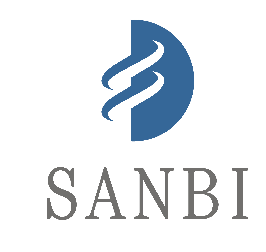

In [56]:
# read the logo into a PIL Image object
logo = Image.open(image_file)
# use matplotlib to show the logo
img = plt.imshow(logo)
plt.axis('off')
plt.show()

width: 1644 height: 1654


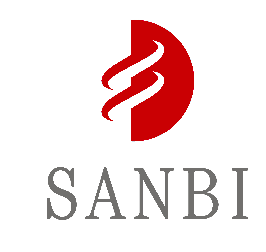

In [66]:
original = logo.copy()
# read the logo again so that we can use this cell over and over
logo = Image.open(image_file)
width = logo.width
height = logo.height
print("width:", width, "height:", height)
for x in range(width):
    for y in range(height):
        pixel = logo.getpixel((x, y))
        (r, g, b) = pixel  # a pixel is red, green, blue
        blueness = b - r
        if blueness > 50:
            # this pixel has a higher blue intensity
            # than its red intensity - it is probably part of the blue
            # part of the logo
            #
            # use the old blue as the new red and bump it up
            new_r = b + 50
            # and set the green to 0
            new_g = 0
            # set the new red to less than the old blue
            new_b = r - 50
            logo.putpixel((x,y), (new_r, 0, new_b))

img = plt.imshow(logo)
plt.axis('off')
plt.show()

#### Challenges

1. Make the logo green
2. Change  the colour of the lettering
3. Make one part of the logo one colour, another part of the logo another color
